<a href="https://colab.research.google.com/github/linssen2/ECE539-Solubility-Identifier-Project/blob/main/11_17_2023_DecisionTree_gen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
from google.colab import drive
import csv
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3,suppress=True)

#Read in data
drive.mount('/content/drive/')
with open('/content/drive/MyDrive/curated-solubility-dataset.csv', 'r') as f:
    l = csv.reader(f)
    data = np.array([list(filter(None,i)) for i in l])
    X = data[1:,9:-5].astype(np.double)
    y = data[1:,5].astype(np.double)

#Convert to labels to value (0 = Not Soluable, 1 = Slightly Soluable, 2 = Soluable)
y = [0 if val < -3.65 else 1 if -1.69 < val < 1 else 2 for val in y]
y = np.asarray(y)

#Partition
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .7, shuffle=True )
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size = .5, shuffle=True)

X_train = np.asfarray(X_train)
X_val = np.asfarray(X_val)
X_test = np.asfarray(X_test)

#Dataset and label features
print('num_samples, num_features', X.shape)
print('num_labels', y.shape)
print('labels', np.unique(y))

#Paritioned data features
print("Training shape: ", str(X_train.shape))
print("Validation shape: ", str(X_val.shape))
print("Testing shape: ", str(X_test.shape))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
num_samples, num_features (9982, 15)
num_labels (9982,)
labels [0 1 2]
Training shape:  (6987, 15)
Validation shape:  (1497, 15)
Testing shape:  (1498, 15)


In [22]:
# Train the classification tree.
from sklearn.tree import DecisionTreeClassifier

X_trainval = np.concatenate((X_train, X_val), 0)
y_trainval = np.concatenate((y_train, y_val), 0)

model = DecisionTreeClassifier()
model.fit(X_trainval ,y_trainval)


# Test the trained decision tree
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics


y_hat = model.predict(X_test)
acc = model.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_hat)

print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
print("Confusion Matrix: ")
print(cm)

Accuracy: 69.89%
Confusion Matrix: 
[[386  26  77]
 [ 31 338  97]
 [ 96 124 323]]


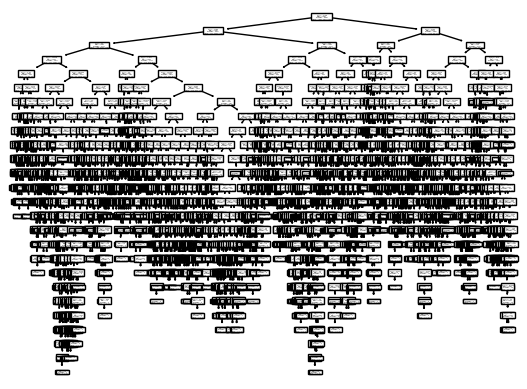

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(model)
plt.show()